# Tinder Profile Match Prediction Using AdaBoost Classifier


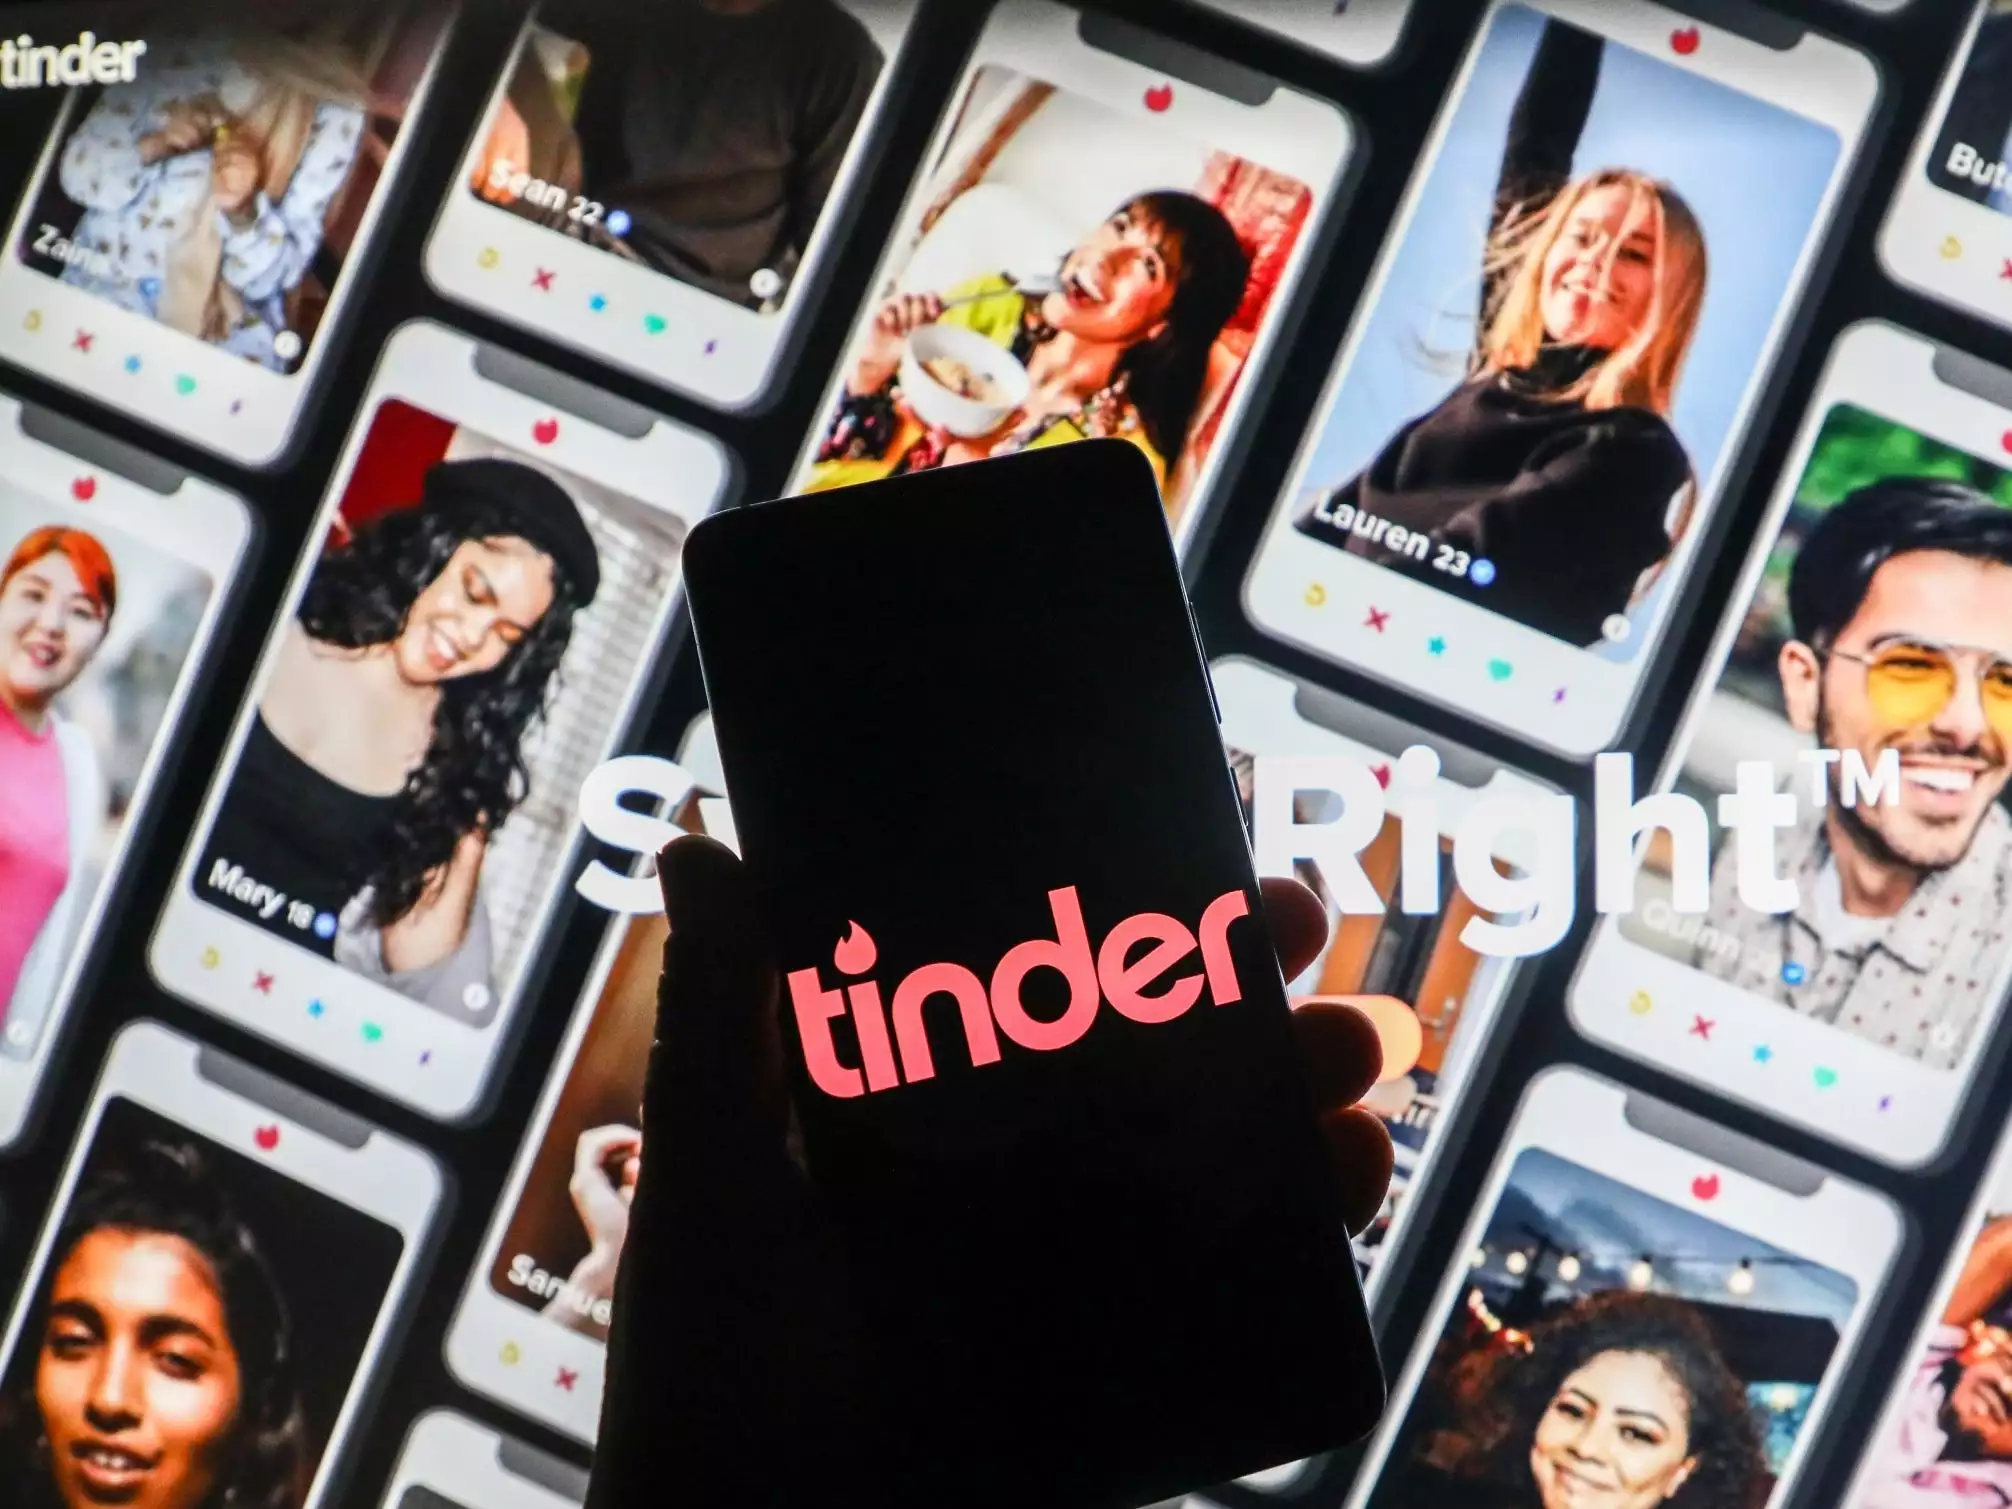

In [15]:
from IPython.display import Image
Image(filename = "a.jpg",height = 600, width= 900)

In [279]:
import numpy as np
import pandas as pd 
import missingno as m
import plotly.express as px
import seaborn as sns

## Reading dataset

In [280]:
data = pd.read_csv('Tinder Millennial Match Rate Dataset.csv')
data.shape

(453, 7)

In [281]:
data.head()

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
0,292881,Mobile,Mobile respondents,Yes,797,0.207,Yes
1,292883,Mobile,Mobile respondents,No,1969,0.511,No
2,292885,Mobile,Mobile respondents,I don't use Tinder,1090,0.283,Yes
3,292887,Web,Web-based respondents,Yes,0,0.000,No
4,292889,Web,Web-based respondents,No,0,0.000,No


In [282]:
data.describe().style.background_gradient(cmap = 'Greens')

,ID,Count,Percentage
count,453.000000,453.000000,453.000000
mean,293333.000000,22.373068,0.331141
std,261.828188,136.996075,0.316157
min,292881.000000,0.000000,0.000000
25%,293107.000000,0.000000,0.000000
50%,293333.000000,1.000000,0.250000
75%,293559.000000,4.000000,0.500000
max,293785.000000,1969.000000,1.000000


# Data Clearning and Analysis

In [283]:
data.isnull().sum()

ID                          0
Segment Type                0
Segment Description         0
Answer                      0
Count                       0
Percentage                  0
It became a Relationship    0
dtype: int64

<AxesSubplot:>

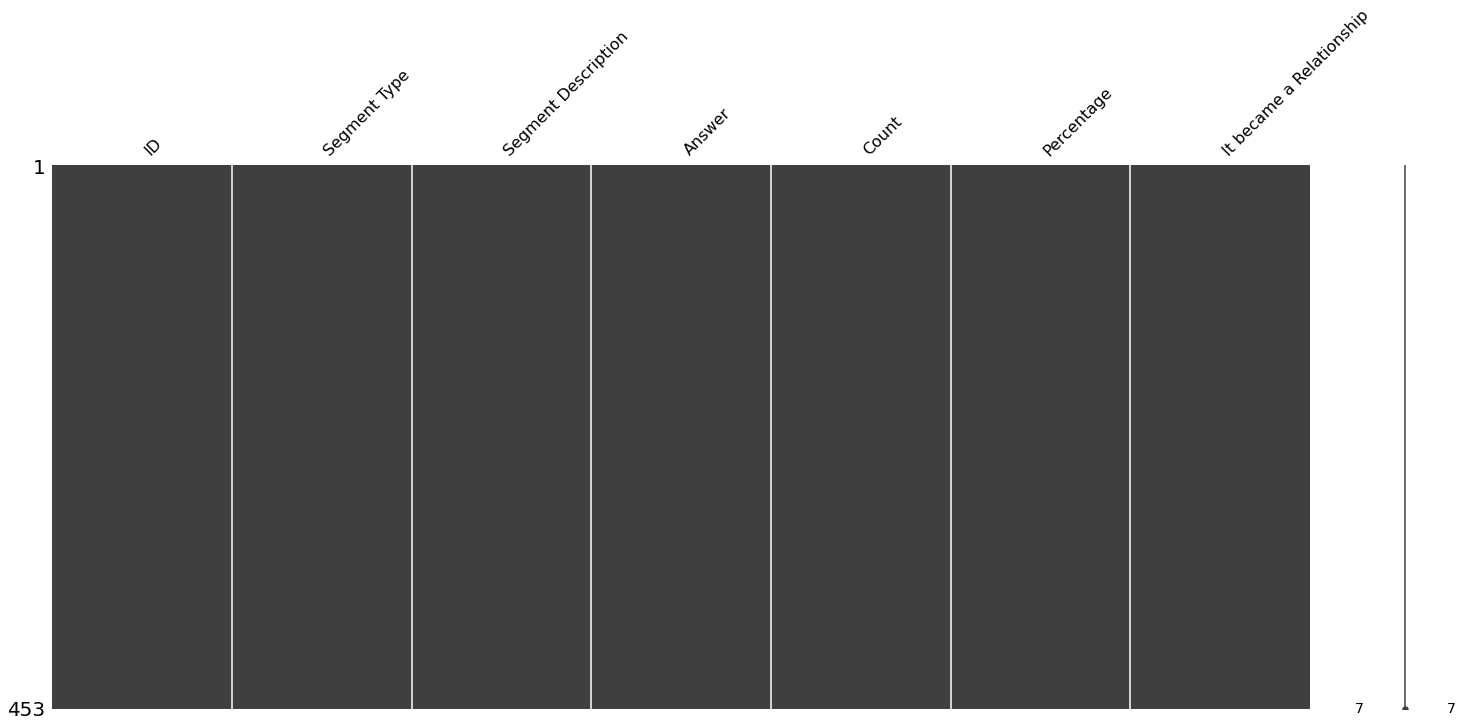

In [284]:
m.matrix(data)

In [285]:
data['Segment Type'].unique()

array(['Mobile', 'Web', 'Gender', 'University'], dtype=object)

In [286]:
data.head()

,ID,Segment Type,Segment Description,Answer,Count,Percentage,It became a Relationship
0,292881,Mobile,Mobile respondents,Yes,797,0.207,Yes
1,292883,Mobile,Mobile respondents,No,1969,0.511,No
2,292885,Mobile,Mobile respondents,I don't use Tinder,1090,0.283,Yes
3,292887,Web,Web-based respondents,Yes,0,0.000,No
4,292889,Web,Web-based respondents,No,0,0.000,No


In [287]:
data = data.drop(columns=['ID','Segment Description'])
data.head()

,Segment Type,Answer,Count,Percentage,It became a Relationship
0,Mobile,Yes,797,0.207,Yes
1,Mobile,No,1969,0.511,No
2,Mobile,I don't use Tinder,1090,0.283,Yes
3,Web,Yes,0,0.000,No
4,Web,No,0,0.000,No


# Univariate Analysis

In [288]:
fig = px.histogram(data, x="Segment Type",title = 'Segment Type Plot')
fig.show()

In [289]:
fig = px.histogram(data, x="Answer",title = 'Answer Plot')
fig.show()

In [290]:
fig = px.histogram(data, x="It became a Relationship",title = 'Target Variable Plot')
fig.show()

In [291]:
fig = px.histogram(data, x="Percentage",title = 'Percentage Plot')
fig.show()

# Bivariate Analysis

In [292]:
fig = px.bar(x=data['Count'], y=data['It became a Relationship'],title = 'Count vs It became a Relationship Plot')
fig.show()

In [293]:
fig = px.bar(x=data['Percentage'], y=data['It became a Relationship'],title = 'Percentage vs It became a Relationship Plot')
fig.show()

In [294]:
fig = px.bar(x=data['Segment Type'], y=data['It became a Relationship'],title = 'Segment Type vs It became a Relationship Plot')
fig.show()

# Multivariate Analysis 

In [295]:
fig = px.scatter(x=data['Count'], y=data['Percentage'],color=data['It became a Relationship'],
                 title = 'Count vs Percentage vs It became a Relationship Plot')
fig.show()

In [296]:
fig = px.scatter(data, color="Segment Type", y="Answer", x="Count",
                 size='Percentage', hover_data=['It became a Relationship'],
                 title = 'Segment Type vs Answer vs Count vs Percentage vs It became a Relationship Plot')
fig.show()

In [297]:
df = data
df.head()

,Segment Type,Answer,Count,Percentage,It became a Relationship
0,Mobile,Yes,797,0.207,Yes
1,Mobile,No,1969,0.511,No
2,Mobile,I don't use Tinder,1090,0.283,Yes
3,Web,Yes,0,0.000,No
4,Web,No,0,0.000,No


# Making Dummy Variables

In [298]:
df = pd.get_dummies(data,columns=['Segment Type','Answer'])
df.head()

,Count,Percentage,It became a Relationship,Segment Type_Gender,Segment Type_Mobile,Segment Type_University,Segment Type_Web,Answer_I don't use Tinder,Answer_No,Answer_Yes
0,797,0.207,Yes,0,1,0,0,0,0,1
1,1969,0.511,No,0,1,0,0,0,1,0
2,1090,0.283,Yes,0,1,0,0,1,0,0
3,0,0.000,No,0,0,0,1,0,0,1
4,0,0.000,No,0,0,0,1,0,1,0


# X and y split

In [299]:
df2=df
y = df2.pop('It became a Relationship')
X=df2

In [300]:
X.head()

,Count,Percentage,Segment Type_Gender,Segment Type_Mobile,Segment Type_University,Segment Type_Web,Answer_I don't use Tinder,Answer_No,Answer_Yes
0,797,0.207,0,1,0,0,0,0,1
1,1969,0.511,0,1,0,0,0,1,0
2,1090,0.283,0,1,0,0,1,0,0
3,0,0.000,0,0,0,1,0,0,1
4,0,0.000,0,0,0,1,0,1,0


In [301]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: It became a Relationship, dtype: object

# Feature Scaling - Normalization 

In [302]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_vars=['Count']
X[num_vars] = scaler.fit_transform(X[num_vars])

# Train Test Split

In [303]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [304]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(339, 9) (114, 9)
(339,) (114,)


# Applying PCA

In [305]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Adaptive Boosting Classifier 

In [306]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=20)
classifier.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=20)

In [307]:
y_test1=y_test.values

# Prediction

In [308]:
y_pred = classifier.predict(X_test)
dataa = np.concatenate((y_pred.reshape(len(y_pred),1), y_test1.reshape(len(y_test1),1)),1)
dataa

array([['No', 'No'],
       ['No', 'No'],
       ['No', 'No'],
       ['No', 'No'],
       ['No', 'Yes'],
       ['No', 'No'],
       ['No', 'No'],
       ['No', 'No'],
       ['No', 'No'],
       ['No', 'Yes'],
       ['No', 'No'],
       ['No', 'No'],
       ['No', 'Yes'],
       ['No', 'Yes'],
       ['No', 'No'],
       ['No', 'No'],
       ['No', 'Yes'],
       ['No', 'No'],
       ['No', 'Yes'],
       ['No', 'Yes'],
       ['No', 'No'],
       ['No', 'No'],
       ['No', 'Yes'],
       ['No', 'No'],
       ['No', 'No'],
       ['No', 'No'],
       ['No', 'No'],
       ['No', 'Yes'],
       ['No', 'Yes'],
       ['No', 'No'],
       ['No', 'No'],
       ['No', 'Yes'],
       ['No', 'No'],
       ['No', 'No'],
       ['No', 'No'],
       ['No', 'No'],
       ['No', 'Yes'],
       ['No', 'Yes'],
       ['No', 'No'],
       ['No', 'No'],
       ['No', 'Yes'],
       ['No', 'No'],
       ['No', 'Yes'],
       ['No', 'No'],
       ['No', 'No'],
       ['No', 'No'],
       ['No', 'Yes'

# Prediction for a New Data

In [309]:
print(classifier.predict(scaler.transform(pca.transform([[1090,0.983,1,1,1,1,1,0,1]]))))

['No']


In [310]:
dataset = pd.DataFrame({'y_test': dataa[:, 0], 'y_pred': dataa[:, 1]})
dataset.to_csv('accuracy.csv')

In [311]:
dataset = pd.read_csv('accuracy.csv')
dataset.head()

,Unnamed: 0,y_test,y_pred
0,0,No,No
1,1,No,No
2,2,No,No
3,3,No,No
4,4,No,Yes


# Confusion Matrix Plot

In [312]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

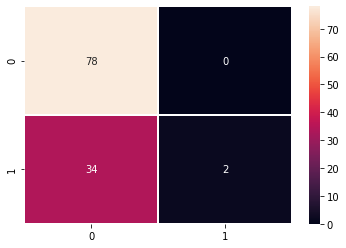

In [313]:
sns.heatmap(cm,annot=True,
            linewidths=.5)

# Accuracy Score

In [314]:
print('Accuracy Score : ',accuracy_score(y_test, y_pred))

Accuracy Score :  0.7017543859649122


In [315]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.70      1.00      0.82        78
         Yes       1.00      0.06      0.11        36

    accuracy                           0.70       114
   macro avg       0.85      0.53      0.46       114
weighted avg       0.79      0.70      0.60       114



# This Model can Predict a Tinder Match with an Accuracy of 70%